In [1]:
%%time
#Standard imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 15)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib as plt

CPU times: user 1.39 s, sys: 529 ms, total: 1.92 s
Wall time: 2.5 s


In [2]:
df = pd.read_csv('fdf.csv')
df.head()
dftab = df

,address,from_finex_tx,from_finex_vol,vol_per_tx,is_smart_contract,2nd_order_med_gas_from,2nd_order_tx_from,2nd_order_vol_from,2nd_order_vol_per_tx_from,2nd_order_smart_contract_%,2nd_order_med_gas_to,2nd_order_tx_to,Address_ID
0,0x2b1405e72f56c67caf79851af1959517944de11e,2,3.769213e+17,1.884606e+17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0x8b7bffc6f0dce0569da00749559529b339d0e578,1,8.000000e+19,8.000000e+19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0x28571a8857a4c659c2c98964d939b45ce8aa9934,1,2.628879e+18,2.628879e+18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,0x95a254f6ce82af5e253ee3b11a64739698408a7c,1,1.297280e+18,1.297280e+18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0xb024c066421aea66c86567fdf5a2548c94397da9,3,1.316550e+19,4.388500e+18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [3]:
df = df.drop(columns = ['address', 'Address_ID', '2nd_order_med_gas_from', '2nd_order_med_gas_to'])
df.shape
df['from_finex_tx'] = df['from_finex_tx'].astype(float)
df.info()
df.head()

(3999, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 9 columns):
from_finex_tx                 3999 non-null float64
from_finex_vol                3999 non-null float64
vol_per_tx                    3999 non-null float64
is_smart_contract             3999 non-null float64
2nd_order_tx_from             3999 non-null float64
2nd_order_vol_from            3999 non-null float64
2nd_order_vol_per_tx_from     3999 non-null float64
2nd_order_smart_contract_%    3999 non-null float64
2nd_order_tx_to               3999 non-null float64
dtypes: float64(9)
memory usage: 281.3 KB


,from_finex_tx,from_finex_vol,vol_per_tx,is_smart_contract,2nd_order_tx_from,2nd_order_vol_from,2nd_order_vol_per_tx_from,2nd_order_smart_contract_%,2nd_order_tx_to
0,2.0,3.769213e+17,1.884606e+17,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,8.000000e+19,8.000000e+19,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,2.628879e+18,2.628879e+18,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.297280e+18,1.297280e+18,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,1.316550e+19,4.388500e+18,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Apply standard scaler
scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

pca = PCA(n_components=2)
pca_r = pca.fit_transform(df)
X_norm = normalize(pca_r)
pca_result = pd.DataFrame(pca_r)
pca_result.columns = ['pca-one', 'pca-two']

km = KMeans(n_clusters=3)
cl = km.fit_predict(X_norm)
mu_digits = km.cluster_centers_
mu_digits.shape

pca_result['cl'] = cl
pca_result['address'] = dftab['address']
type(pca_result)
pca_result.to_csv('pca_result3.csv')
pca_result

(3, 2)

pandas.core.frame.DataFrame

,pca-one,pca-two,cl,address
0,-2.879544e+20,-1.352543e+20,0,0x2b1405e72f56c67caf79851af1959517944de11e
1,-2.846792e+20,-4.766918e+19,0,0x8b7bffc6f0dce0569da00749559529b339d0e578
2,-2.878601e+20,-1.327578e+20,0,0x28571a8857a4c659c2c98964d939b45ce8aa9934
3,-2.879148e+20,-1.342222e+20,0,0x95a254f6ce82af5e253ee3b11a64739698408a7c
4,-2.875060e+20,-1.220998e+20,0,0xb024c066421aea66c86567fdf5a2548c94397da9
5,-2.728347e+20,3.137670e+20,2,0x65eca628950aa38993e9477074d2906174bb977f
6,-2.879476e+20,-1.350987e+20,0,0x99045f200d3503d9d4b20d42a927a8e24abb53dc
7,-2.879449e+20,-1.350253e+20,0,0x244596650841e4f5d62c8be177f355237ddd4fcc
8,-2.867396e+20,-9.963479e+19,0,0xcf51a1b2af486993fa138b3f940746fae061a47c
9,-2.879211e+20,-1.343904e+20,0,0xb8ab6335f2e854a642113537d9a87327301460de


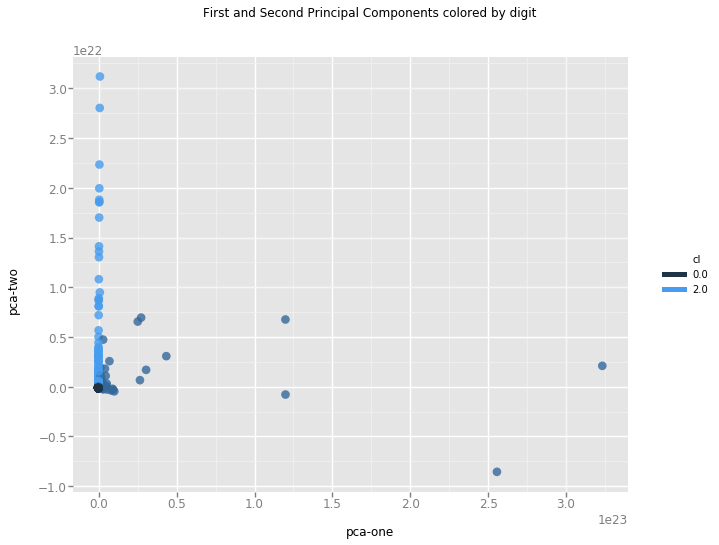

<ggplot: (-9223372029297646413)>

In [27]:
from ggplot import *

chart = ggplot(pca_result, aes(x='pca-one', y='pca-two', color='cl') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart

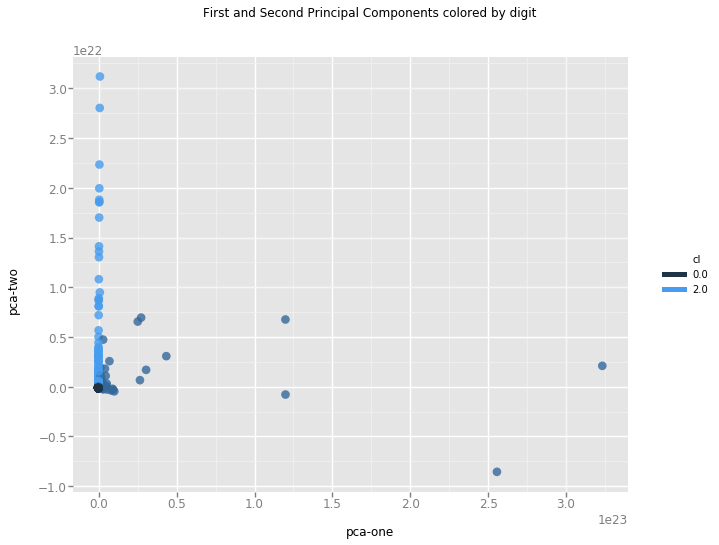

<ggplot: (7556651212)>

In [28]:
from ggplot import *

chart = ggplot(pca_result, aes(x='pca-one', y='pca-two', color='cl') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart